In [59]:
import pandas as pd
import numpy as np
from scipy.stats.stats import ttest_ind
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sqlalchemy import create_engine
import warnings

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "studentsperformance"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from studentsperformance", con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<IPython.core.display.Javascript object>

In [5]:
df.isna().mean()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

<IPython.core.display.Javascript object>

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<IPython.core.display.Javascript object>

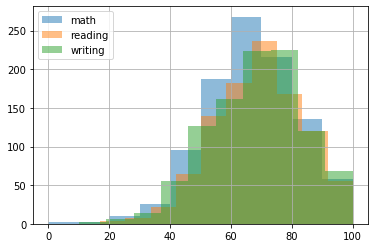

<IPython.core.display.Javascript object>

In [11]:
df["math score"].hist(alpha=0.5, label="math")
df["reading score"].hist(alpha=0.5, label="reading")
df["writing score"].hist(alpha=0.5, label="writing")
plt.legend()
plt.show()

### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [31]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<IPython.core.display.Javascript object>

In [19]:
df.groupby("gender").median()

,math score,reading score,writing score
gender,,,
female,65,73,74
male,69,66,64


<IPython.core.display.Javascript object>

We can see from the table that there do appear to be differences in the median values of test scores by gender.  However, we'd need to do a comparitive statistical test on the different pairs of scores for math, reading, and writing to know if these differences are significant.  We'd also need to test for normality, first.  Because I'm short on time, I'll do this comparison for math only at the moment.

In [62]:
male_math = df["math score"].loc[df["gender"] == "male"]
female_math = df["math score"].loc[df["gender"] == "female"]

# test for normality using Shapiro-Wilk Test
_, p1 = shapiro(male_math)
_, p2 = shapiro(female_math)

print(p1, p2)

# we reject the null hypothesis that these are drawn from normal distributions
# we now use a Mann-Whitney U-test to see if these two distributions are drawn
# from the same parent distributions

_, p3 = mannwhitneyu(male_math, female_math)

print(p3)

#we reject the null that these are drawn from the same parent population.
#we say that there is a statisically significant difference between 
#the median math scores for men and women.

0.03796108067035675 0.0035164919681847095
2.1395383867393836e-07


<IPython.core.display.Javascript object>

In [67]:
df.groupby("race/ethnicity").median()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.0,64.0,62.0
group B,63.0,67.0,67.0
group C,65.0,71.0,68.0
group D,69.0,71.0,72.0
group E,74.5,74.0,72.0


<IPython.core.display.Javascript object>

In [68]:
ethnicities = df["race/ethnicity"].unique()
print(ethnicities)

['group B' 'group C' 'group A' 'group D' 'group E']


<IPython.core.display.Javascript object>

In [30]:
df.groupby("parental level of education").median()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.0,72.5,70.5
bachelor's degree,68.0,73.0,74.0
high school,63.0,66.0,64.0
master's degree,73.0,76.0,75.0
some college,67.5,70.5,70.0
some high school,65.0,67.0,66.0


<IPython.core.display.Javascript object>

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

### 3. Does the test preparation course seem to have an effect on the exam performances?

### 4. Which 2 exam scores are most correlated with each other?

In [65]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<IPython.core.display.Javascript object>